In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


import warnings
warnings.filterwarnings("ignore")

In [146]:
plt.style.use('dark_background')

In [147]:
df = pd.read_csv("TaxiFare.csv")

In [148]:
df.shape

(50000, 8)

In [149]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [150]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
12452,17:00.0,9.70,2012-01-08 02:17:00 UTC,-73.954428,40.764152,-73.986432,40.777687,1
41094,29:15.0,6.10,2010-08-06 09:29:15 UTC,-74.006667,40.706165,-74.009933,40.720659,1
35707,13:00.0,32.10,2012-07-19 15:13:00 UTC,-73.979727,40.760470,-73.872438,40.774467,1
32187,19:22.0,8.90,2009-08-17 16:19:22 UTC,-73.987536,40.728654,-73.986469,40.755431,1
36428,34:19.0,12.10,2011-02-11 22:34:19 UTC,-73.958942,40.771671,-73.993903,40.746651,1
26204,40:00.0,6.50,2011-05-14 21:40:00 UTC,0.000000,0.000000,0.000000,0.000000,2
44846,24:52.0,20.00,2014-08-26 09:24:52 UTC,-73.962508,40.758696,-74.003311,40.714482,1
44926,12:01.0,7.00,2013-04-07 09:12:01 UTC,-73.947712,40.780470,-73.954608,40.765232,1
48729,39:00.0,19.47,2010-06-02 17:39:00 UTC,-73.993272,40.747225,-73.954505,40.728722,5
18685,11:21.0,57.33,2015-03-14 16:11:21 UTC,-73.790085,40.643650,-73.970322,40.750656,1


In [151]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [152]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [153]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


<Axes: xlabel='amount'>

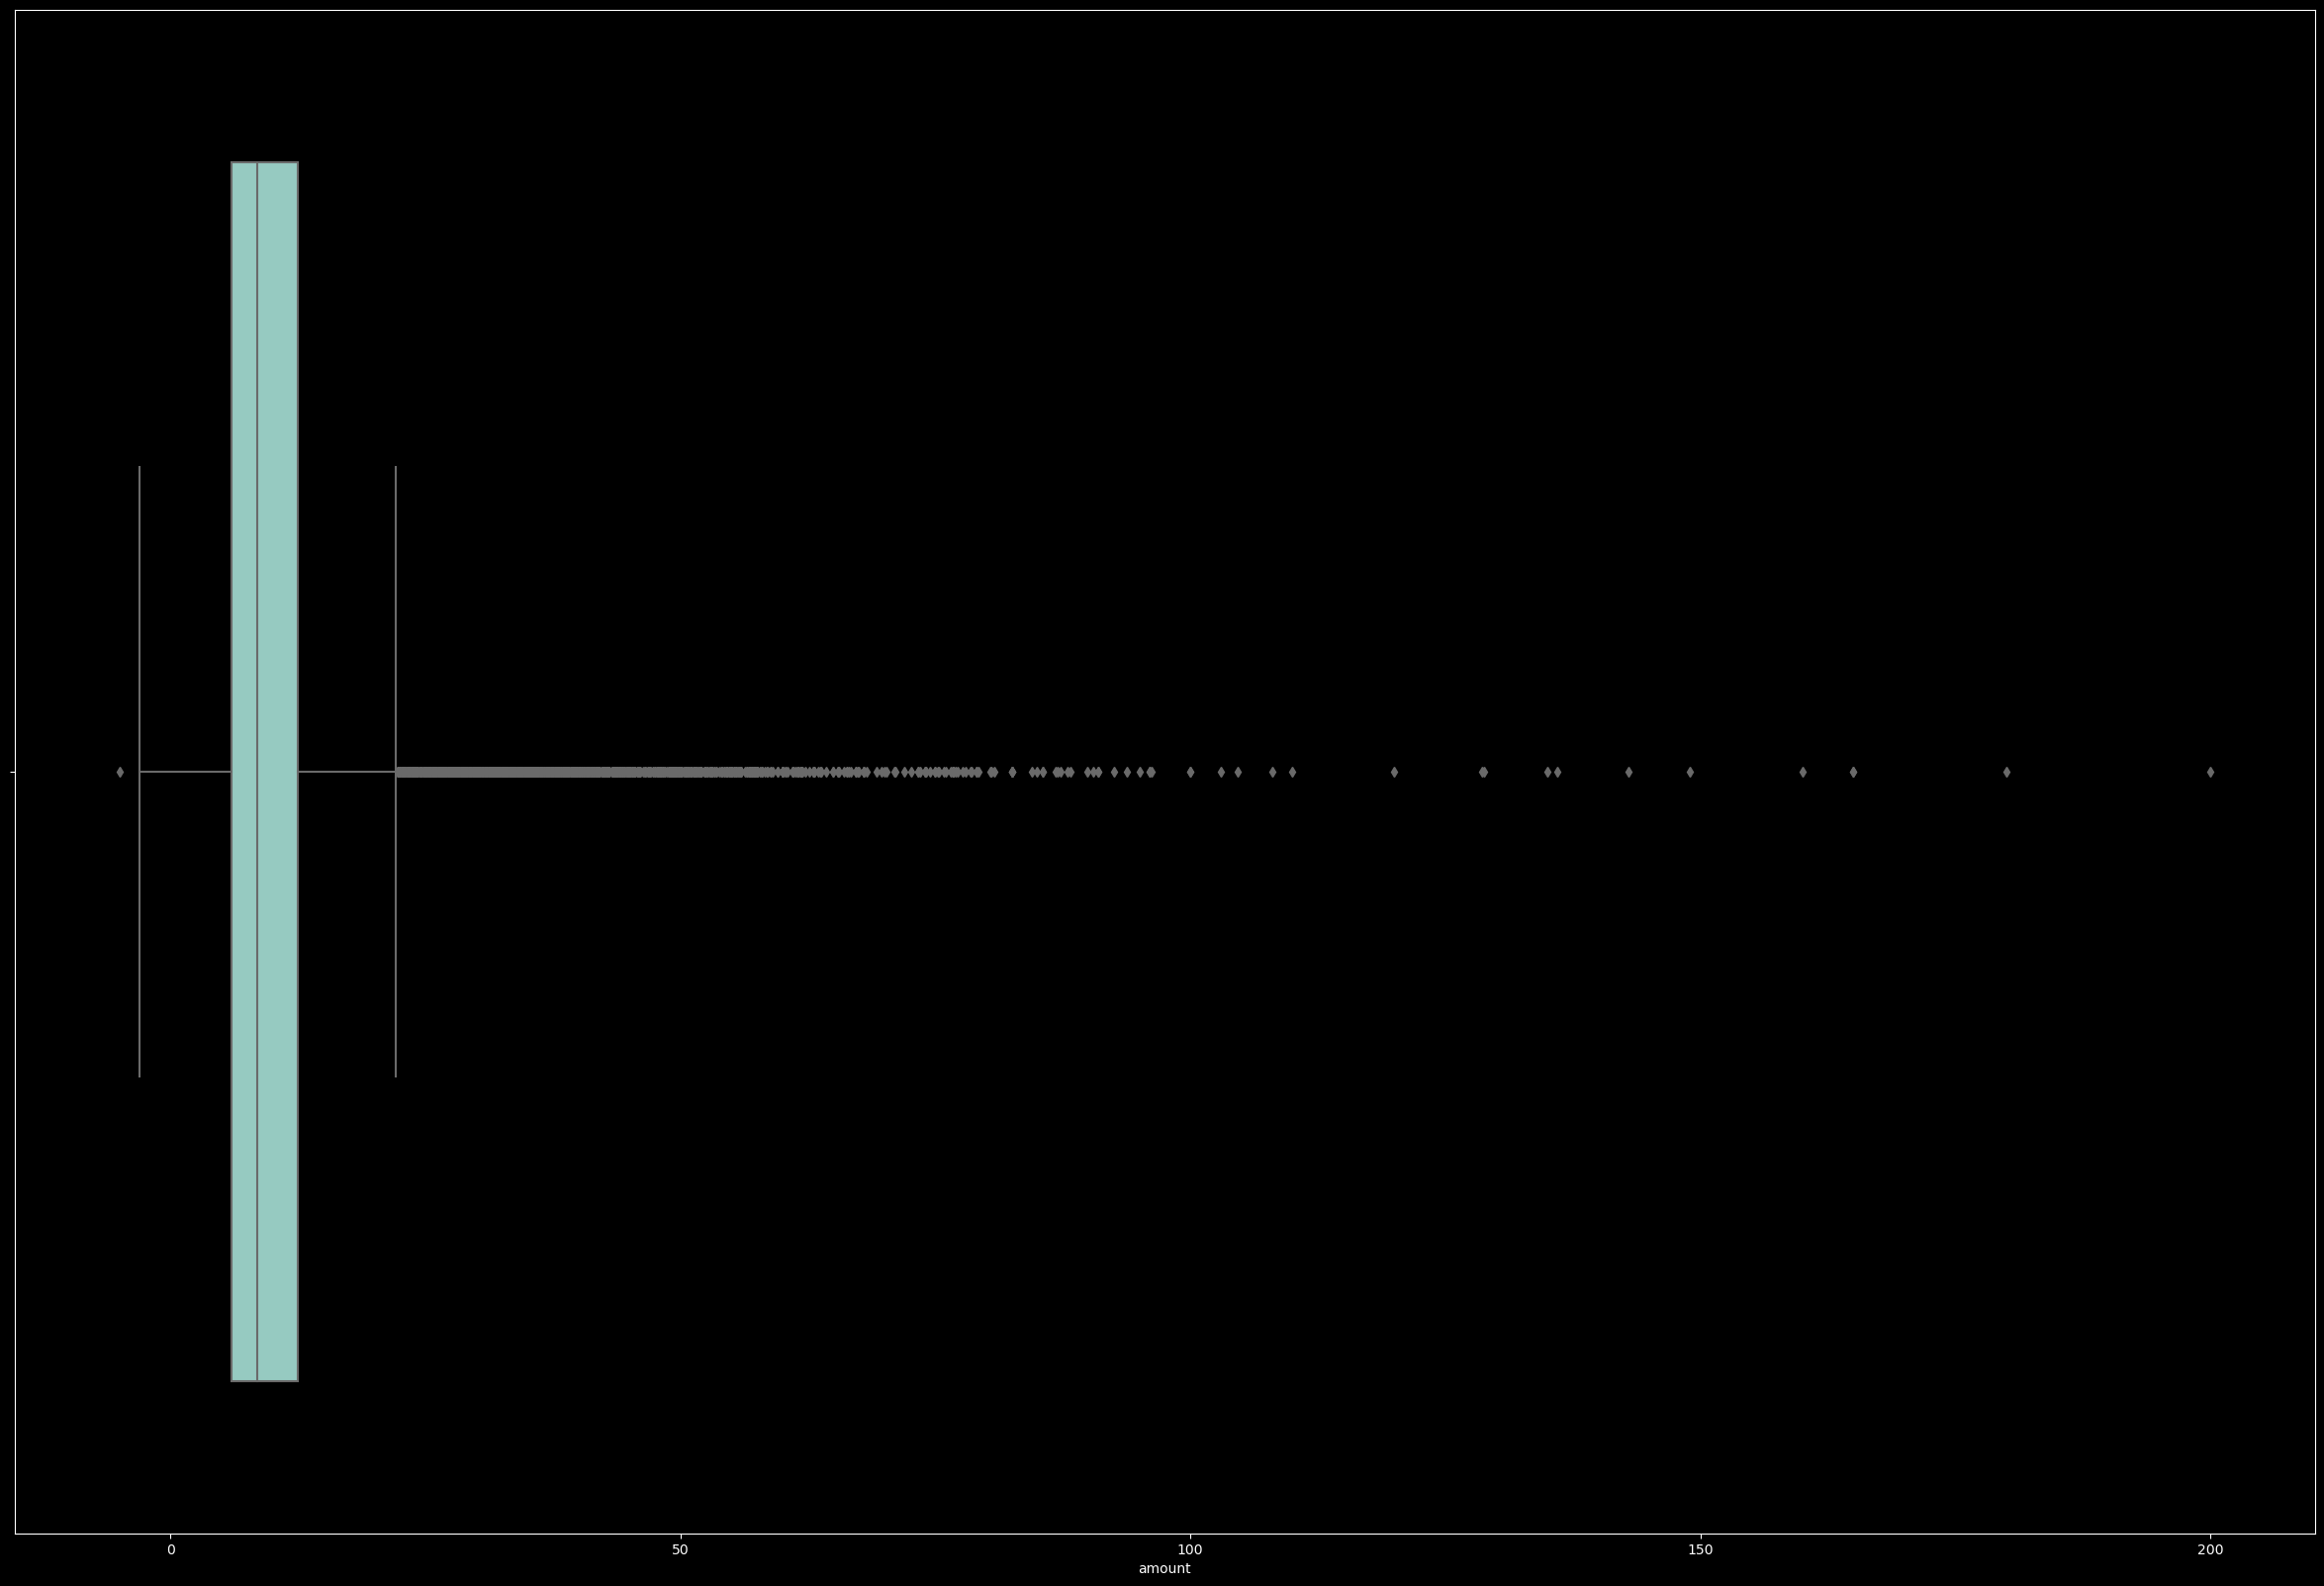

In [154]:
plt.figure(figsize=(30,20))
sns.boxplot(x="amount",data=df)

## Outlier treatment

In [155]:
q1=df["amount"].quantile(0.25)
q3=df["amount"].quantile(0.75)
iqr=q3-q1

In [156]:
lower_threshold=q1-1.5*iqr
upper_threshold=q3+1.5*iqr

In [157]:
lower_threshold

-3.75

In [158]:
upper_threshold

22.25

In [159]:
df=df[(df["amount"]>=lower_threshold)&(df["amount"]<=upper_threshold)]

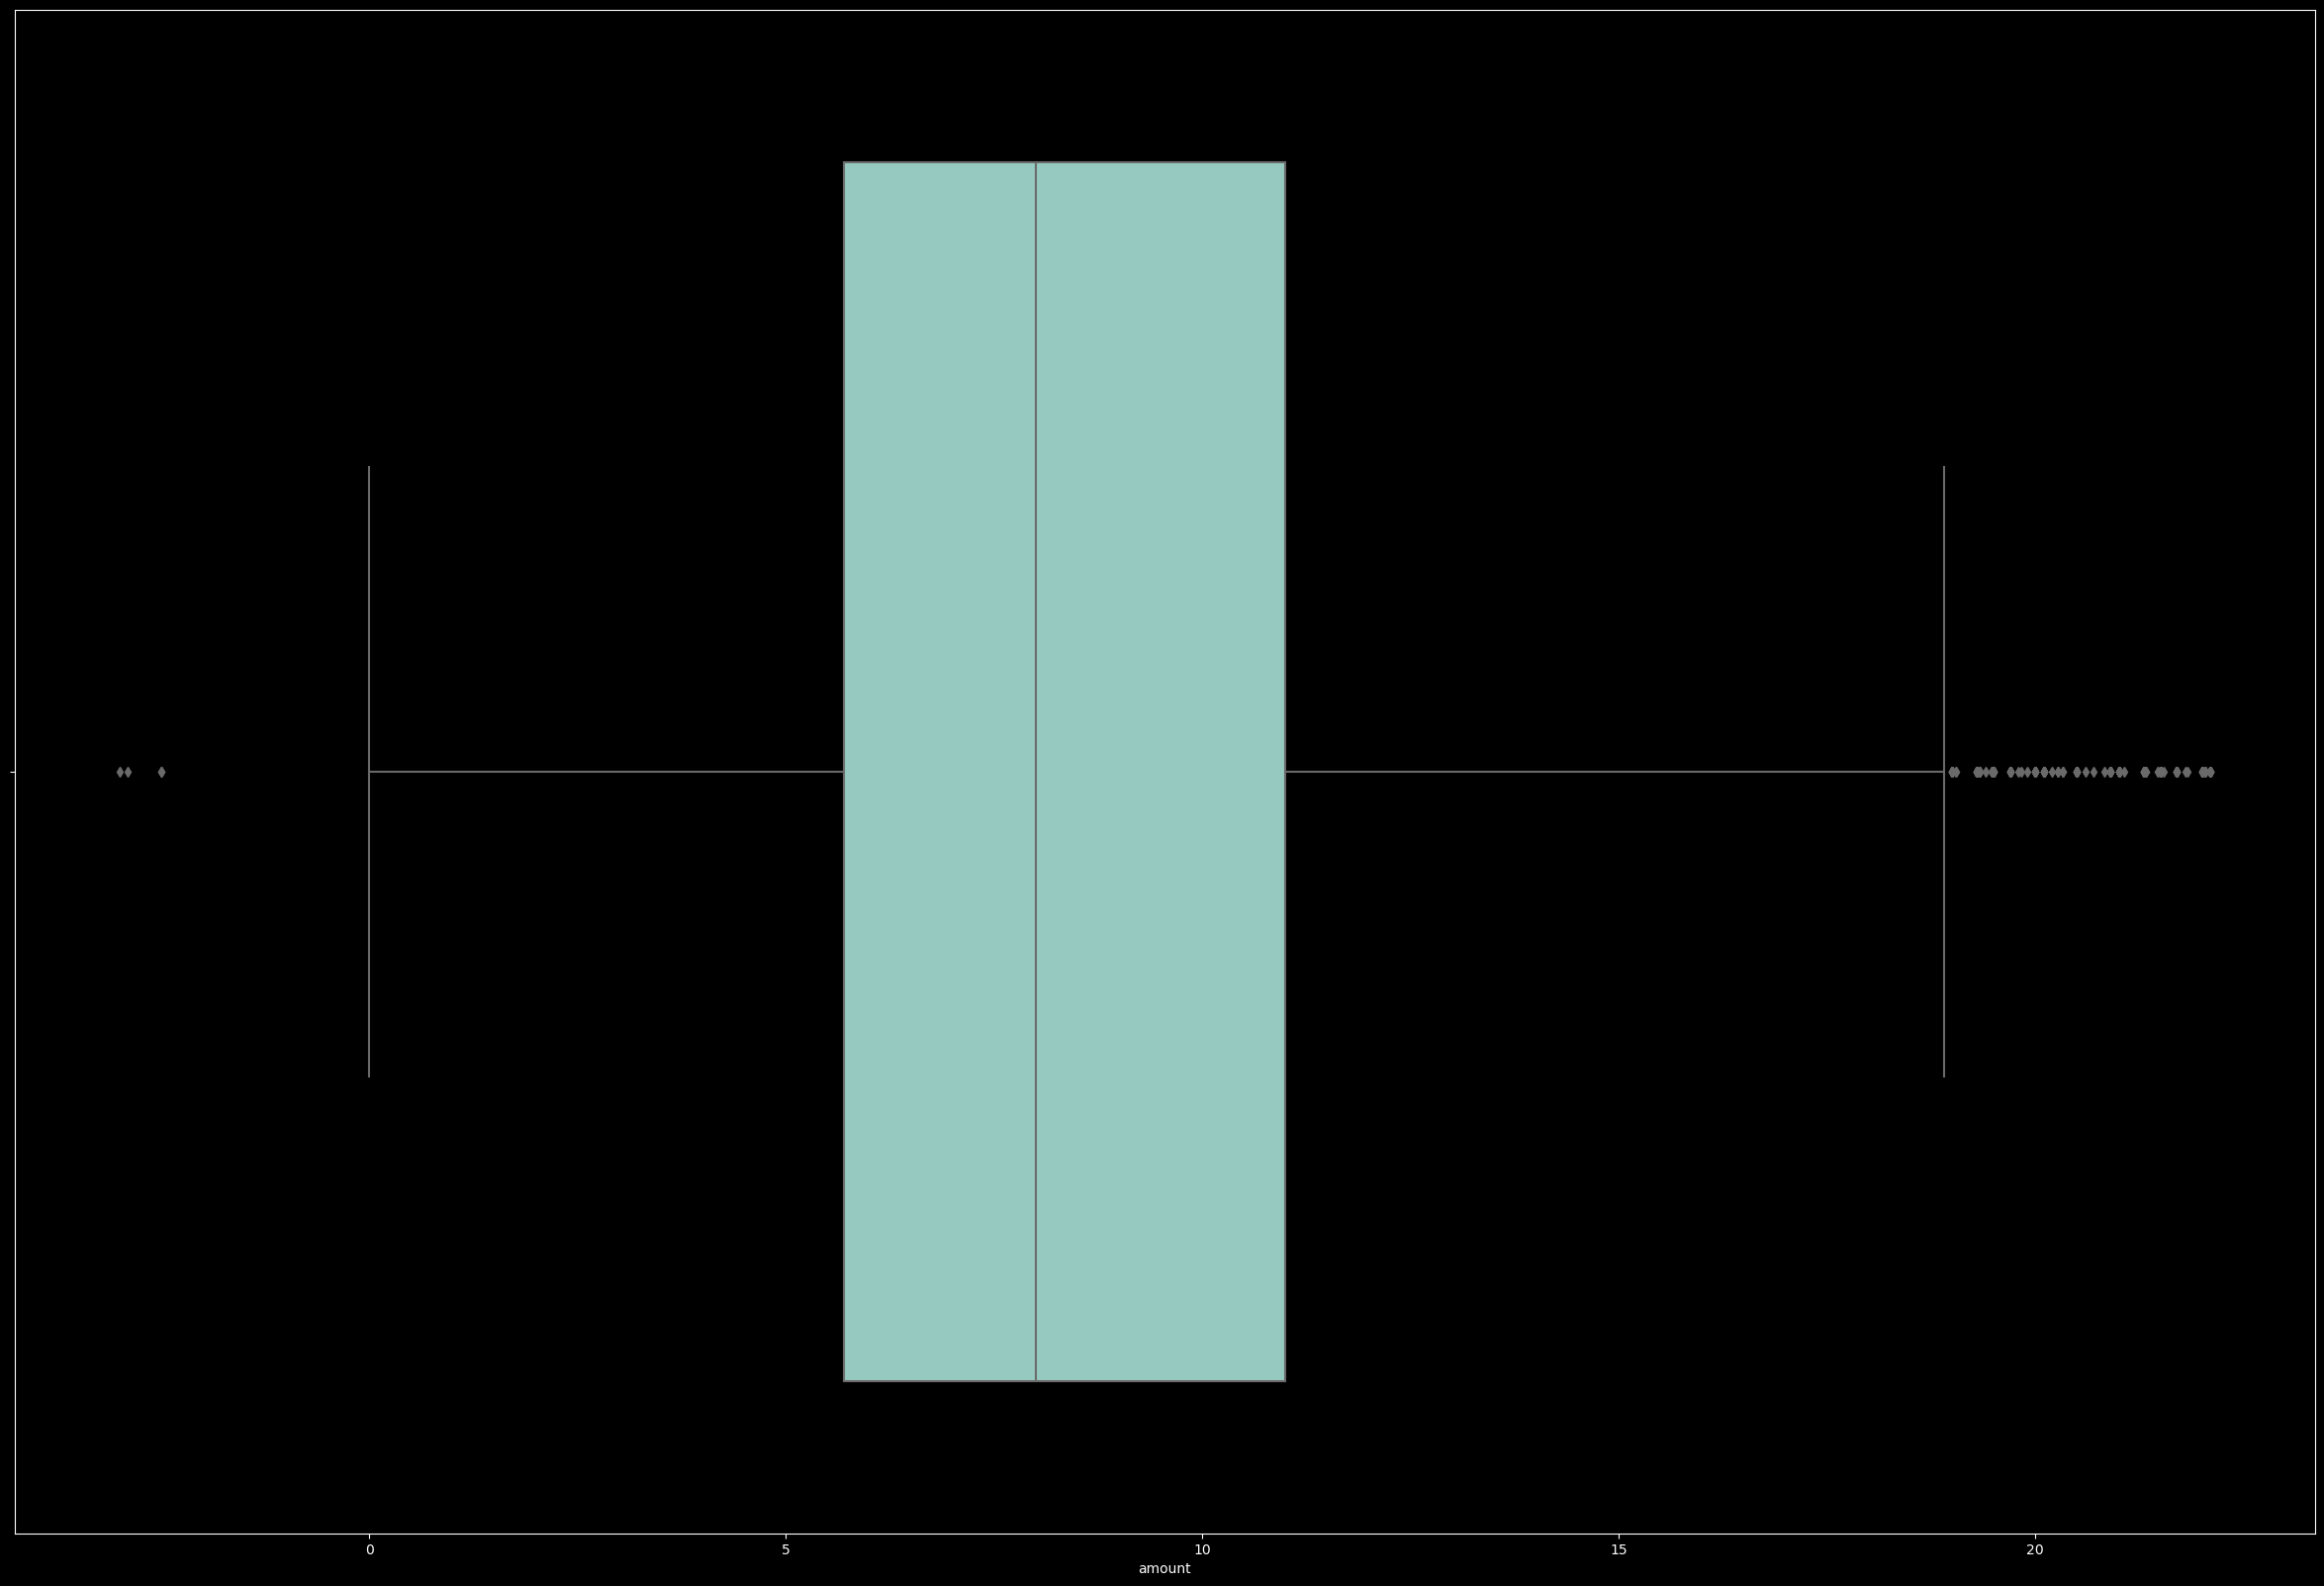

In [160]:
plt.figure(figsize=(30,20))
sns.boxplot(x="amount",data=df)
plt.show()

<Axes: >

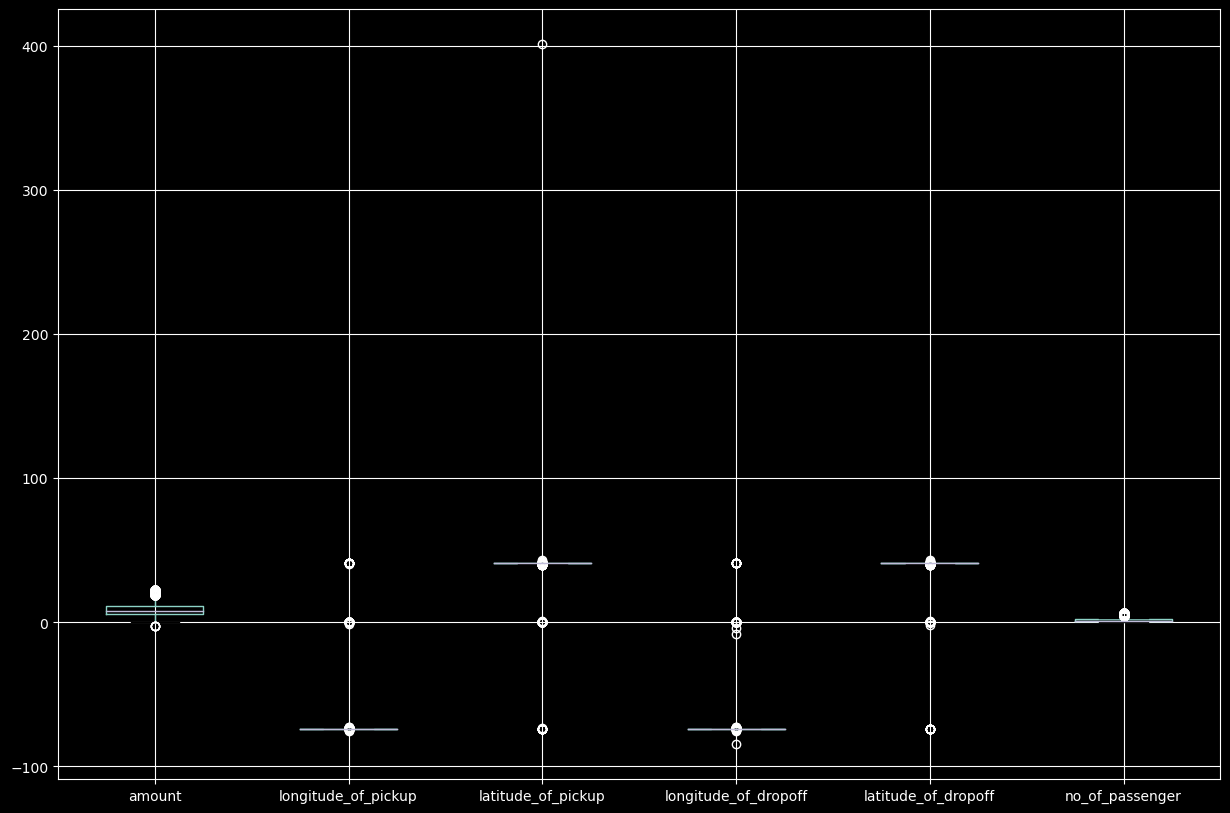

In [161]:
plt.figure(figsize=(15,10))
df.boxplot()

In [162]:
import calendar
import pandas as pd

# Assuming "date_time_of_pickup" is in a string format, convert it to datetime
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

# Now you can use .dt accessor on the datetime column
df['date_pickup'] = df['date_time_of_pickup'].dt.date
df['day_pickup'] = df['date_time_of_pickup'].dt.day
df['hour_pickup'] = df['date_time_of_pickup'].dt.hour
df['day_of_week_pickup'] = df['date_time_of_pickup'].apply(lambda x: calendar.day_name[x.weekday()])
df['month_pickup'] = df['date_time_of_pickup'].dt.month
df['year_pickup'] = df['date_time_of_pickup'].dt.year

df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_pickup,day_pickup,hour_pickup,day_of_week_pickup,month_pickup,year_pickup
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [163]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
date_pickup                          object
day_pickup                            int64
hour_pickup                           int64
day_of_week_pickup                   object
month_pickup                          int64
year_pickup                           int64
dtype: object

In [164]:
df.drop(columns=["unique_id","date_time_of_pickup","date_pickup","day_of_week_pickup"],axis=1,inplace=True)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_pickup,hour_pickup,month_pickup,year_pickup
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,3,2010


In [167]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
day_pickup                int64
hour_pickup               int64
month_pickup              int64
year_pickup               int64
dtype: object

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [169]:
x = df.drop(['amount'], axis=1)
y = df['amount']

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0)

In [171]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [174]:
model_1.score(x_train, y_train)


0.02515843461921219

In [175]:
model_1.score(x_test, y_test)

0.021639568581068302

In [177]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2, y_train))


[7.82691746 8.43994789 8.47040251 ... 7.72043387 8.90227493 8.52216723]
0.028271398937781744


In [178]:
from sklearn.tree import DecisionTreeRegressor

In [212]:
model3 = DecisionTreeRegressor(max_depth=10)

In [213]:
model3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [214]:
model3.score(x_train,y_train)

0.4978639437411344

In [215]:
model3.score(x_test,y_test)

0.3898009546788678

In [223]:
y_pred=model_1.predict(x_test)
y_pred[0:5]

array([7.72241243, 8.4426093 , 8.65239022, 9.97651012, 9.35894507])

In [224]:
y_test[0:5]

2633      6.5
49417     4.5
5951      6.1
23576     6.5
22535    13.5
Name: amount, dtype: float64